In [3]:
# from ASCID_variable import *
# from ASCID_analysis import *
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import os
import csv
import pandas as pd
from scipy.optimize import curve_fit
import glob
import pickle
from matplotlib.colors import LogNorm

In [4]:
def label(x,y,a,b,pur="all"):
    plt.xlabel(x,fontsize=18)
    plt.ylabel(y,fontsize=18)
    if pur=="all":
        plt.rcParams['figure.figsize'] = [a,b]
    elif pur=="chi2":
        plt.title("Chi2 Analysis, S-%s, Channel %s"%(a,b), fontsize=20)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    return 

def gaus_fit(ri,rf,fx,fy,nm="norm"):
    from scipy.optimize import curve_fit
    def gaus(x,a,x0,sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))
    from scipy.stats import chisquare
    b=len(bins)-1
    hist_PI=[]
    for j in range(b):
        if ri<=bins[j]<=rf:                                                          #Bins range for gauss fit
            hist_PI.extend([j])
    x=bins[hist_PI]-(bins[1]-bins[0])/2
    y=n[hist_PI]
    l = len(x)
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))#the number of data
    popt,pcov = curve_fit(gaus,x,y, p0=[max(y), mean, sigma])
    m=x[1]-x[0]
    X=np.arange(x.min(),x.max(),m/10)
#     chi2=chisquare(n[hist_PI],f_exp=gaus(x,*popt))
#     b=chi2[0]/(len(hist_PI)-3)
    if nm=="norm":
        textstr = '\n'.join((
        r'$\mu=%.2f \pm %.2f$ ADC' % (popt[1], np.sqrt(pcov[1,1])),
        r'$\sigma=%.2f \pm %.2f$ ADC' % (popt[2], np.sqrt(pcov[2,2]))
        ))               #"r'$\chi^2/Dof=%.2f$' % (b, )"
    elif nm=="keV":
        textstr = '\n'.join((
            r'$\mu=%.2f \pm %.1f$ keV' % (popt[1], np.sqrt(pcov[1,1])),
            r'$\sigma=%.2f \pm %.1f$ keV' % (popt[2], np.sqrt(pcov[2,2]))
            )) 
    elif nm=="keV_br":
        textstr = '\n'.join((
            r'$\mu=%.2f \pm %.2f$ eV' % (popt[1]*1000, np.sqrt(pcov[1,1])*1000),
            r'$\sigma=%.2f \pm %.2f$ eV' % (popt[2]*1000, np.sqrt(pcov[2,2])*1000)
            ))               #"r'$\chi^2/Dof=%.2f$' % (b, )"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(fx, fy, textstr, fontsize=12,
             verticalalignment='top', bbox=props)
    return popt[0], popt[1],popt[2],plt.plot(X,gaus(X,*popt),'r')

In [8]:
def find_files_partial_match_in_folders(partial_name, search_path):
    """
    Search for files with partially matching names in all subdirectories.

    :param partial_name: Part of the filename to search for.
    :param search_path: Root directory to start the search.
    :return: List of full paths to matching files.
    """
    file_paths = []
    for root, dirs, files in os.walk(search_path):  # Traverse all subdirectories
        for file in files:
            if partial_name in file:  # Check for partial match
                file_paths.append(os.path.join(root, file))  # Save the full path
    sorted_file = sorted(file_paths, key)
    return file_paths

In [4]:
save_folder="../RUN5/Sc46/Figures/Take4/"  
partial_name = "Output_Run"

In [5]:
root_directory="../RUN5/Sc46/Figures/Take4/"  
partial_name = "Calibration_"
sorted_files = search_and_sort_files(root_directory, partial_name)
len(sorted_files)

NameError: name 'search_and_sort_files' is not defined

In [42]:
len(files)

886

In [63]:
Mean_all = np.zeros((26, 2, len(sorted_files)))

In [65]:
for j in range(len(sorted_files)):
    file = sorted_files[j][0]
    f = open('%s'%(file), 'rb')
    dat=pickle.load(f)
    Mean=dat['Mean']
    Mean_all[:, :, j] = Mean
    f.close()

In [48]:
time = np.arange(1, len(files)+1)*15
for c in range(26):
    plt.plot(time, Mean_all[c, 0, :], ".")
    plt.plot(time, Mean_all[c, 1, :], ".")
    label("time (min)", "Energy (ADC)", 12, 5)
    plt.title("Channel - %d peak shift per 15 min, Sc46 Peak"%c , fontsize = 16)
    plt.savefig("%s/Result/Peakshift_Channel-%d.jpg"%(save_folder, c))
    plt.close()

In [55]:
variation = []
for c in range(26):
    var = Mean_all[c, 0, :].std()/Mean_all[c, 0, :].mean()
    variation.append([var*889])

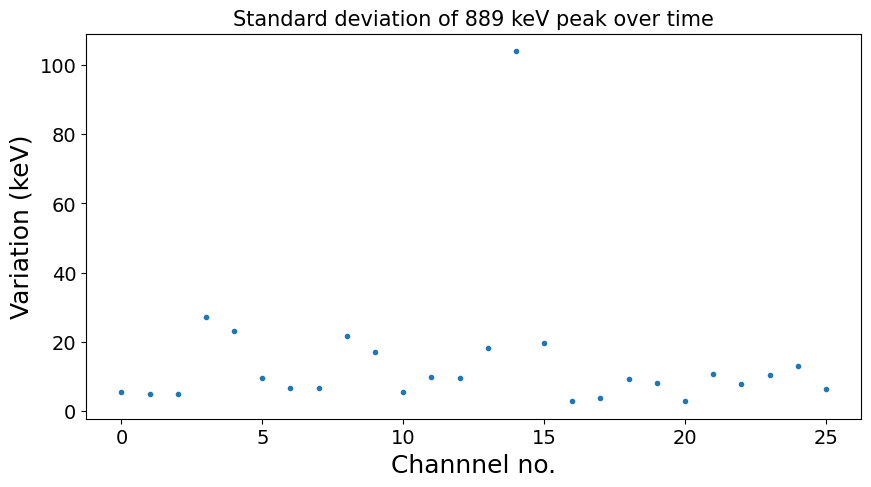

In [60]:
plt.plot(np.arange(26), variation, ".")
label("Channnel no.", "Variation (keV)", 10, 5)
plt.title("Standard deviation of 889 keV peak over time", fontsize = 15)
plt.savefig("%s/Result/Peashift_variation.jpg"%(save_folder))

In [67]:
Mean_all = np.zeros((26, 2, len(sorted_files)))
for j in range(len(sorted_files)):
    file = sorted_files[j][0]
    f = open('%s'%(file), 'rb')
    dat=pickle.load(f)
    Mean=dat['Mean']
    Mean_all[:, :, j] = Mean
    f.close()

In [69]:
c = 12
for c in range(26):
    plt.plot(np.arange(len(sorted_files))/4, Mean_all[c, 0, :], ".")
    plt.ylim(0, np.max(Mean_all[c, 0 , :])+5)
    label("Time (Hr)", "Mean -889 keV(ADC)", 10, 5)
    plt.title(f"Channel No. {c}", fontsize = 15)
    plt.savefig("%s/../Result/Peashift_channel_%d.jpg"%(save_folder, c))
    plt.close()

In [6]:
import os
from glob import glob

def search_and_sort_files(root_dir, partial_name):
    # Search for files in subdirectories with the partial name
    files = glob(f"{root_dir}/**/*{partial_name}*", recursive=True)
    
    # Get files with their modification times
    files_with_times = [(file, os.path.getmtime(file)) for file in files if os.path.isfile(file)]
    
    # Sort files by modification time (most recent first)
    sorted_files = sorted(files_with_times, key=lambda x: x[1])
    
    # Print sorted file paths with modification times
    # for file, mtime in sorted_files:
    #     print(f"{file} - Last Modified: {mtime}")
    
    return sorted_files

# Example usage
root_directory="../RUN5/Na22/Figures/Take4/"  
partial_name = "Output_Run"
# sorted_files = search_and_sort_files(root_directory, partial_name)


In [67]:
sorted_files[0][0]

'../RUN5/Na22/Figures/Take4\\Folder_0\\Output_Run5-folder0_index0.pickle'

In [55]:
nEvent_all = np.zeros(len(sorted_files))
for j in range(len(files)):
    file = sorted_files[j][0]
    f = open('%s'%(file), 'rb')
    dat=pickle.load(f)
    nEvent=dat['nEvent']
    nEvent_all[j] = nEvent
    f.close()

In [47]:
files[100]

'../RUN5/Sc46/Figures/Take4/Folder_120\\Output_Run5-folder120_index3.pickle'

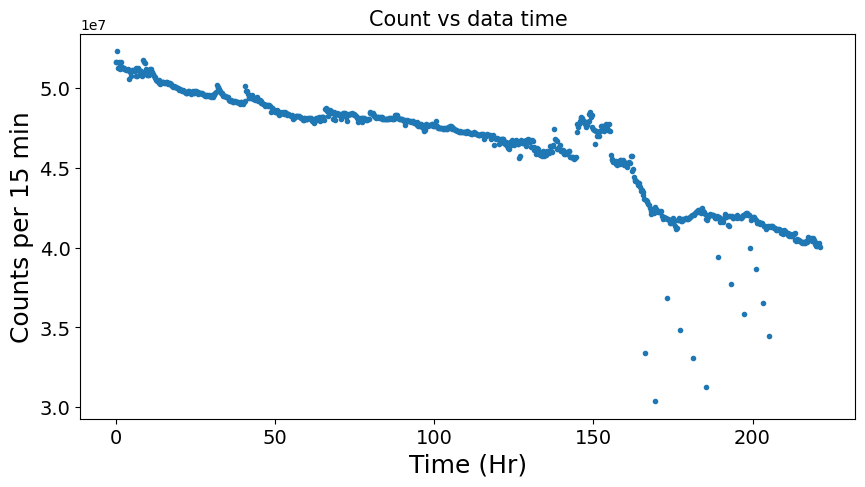

In [59]:
plt.plot(np.arange(len(files))/4, nEvent_all, ".")
# plt.ylim(0, np.max(nEvent_all)+5)
label("Time (Hr)", "Counts per 15 min", 10, 5)
plt.title(f"Count vs data time", fontsize = 15)
plt.savefig("%s/../Result/Count.jpg"%(save_folder))

In [176]:
source = "Cs137"

In [29]:
root_directory="D:/RUN5/Cs137/Figures/Take4"  
partial_name = "Output_Run"
sorted_files = search_and_sort_files(root_directory, partial_name)

In [30]:
len(sorted_files)

19

In [32]:
Time/3600

4.748333333333333

In [31]:

file = sorted_files[0][0]
f = open('%s'%(file), 'rb')
dat=pickle.load(f)
Bins=dat['Bins']
f.close()

Time = 0
nEvent_all = np.zeros(len(sorted_files))
n_EnergyAll_NVeto_all = np.zeros(len(Bins[:-1]))
n_EnergyInner_NVeto_all = np.zeros(len(Bins[:-1]))

for j in range(len(sorted_files)):
    file = sorted_files[j][0]
    f = open('%s'%(file), 'rb')
    dat=pickle.load(f)
    # Bins=dat['Bins']
    Time+=dat['Time']
    n_EnergyAll_NVeto=dat['n_EnergyAll_NVeto']
    n_EnergyAll_NVeto_all += n_EnergyAll_NVeto
    n_EnergyInner_NVeto=dat['n_EnergyInner_NVeto']
    n_EnergyInner_NVeto_all += n_EnergyInner_NVeto
    f.close()

In [40]:
sorted_files[15][0]

'E:/RUN5/Take5/Ba133/Figures\\Folder_1\\Output_Run5-folder1_index3.pickle'

In [39]:
Bins, bins_combined[5:]

(array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340,
        360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600,
        620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860,
        880, 900, 920, 940, 960, 980], dtype=int64),
 array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340,
        360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600,
        620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860,
        880, 900, 920, 940, 960, 980], dtype=int64))

In [40]:
Total_data = n_EnergyAll_NVeto_all.sum()
Total_sim = n_EnergyAll[5:].sum()
sim_energy_match_All = np.array((n_EnergyAll*Total_data/Total_sim), dtype = 'int64')
sim_energy_match_Inner = np.array((n_EnergyInner*Total_data/Total_sim), dtype = 'int64')

In [41]:
save_folder = 'E:/RUN5/Take5/Cs137/Figures'

In [20]:
Bins, bins_combined[10:100]

(array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
        230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350,
        360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480,
        490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610,
        620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740,
        750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870,
        880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990],
       dtype=int64),
 array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
        230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350,
        360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480,
        490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610,
        620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740,
        750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870,
        880, 890, 900, 910, 920, 9

In [42]:
source = "Cs137"

In [ ]:
plt.step(Bins[1:], n_EnergyAll_NVeto_all, label = "Data decays - %d"%n_EnergyAll_NVeto_all.sum())
# plt.plot(x, y_smooth, label='Smoothed Data', color='black', linewidth=2)
plt.step(bins_combined[1:][5:], sim_energy_match_All[5:], label = "Simulation decays - %d"%sim_energy_match_All[5:].sum())
label("Energy (keV)", "Counts", 12, 6)
n, bins = n_EnergyAll_NVeto_all, Bins[1:]
# gaus_fit(1850, 2200, 1200, 8e8, nm = "keV")
# gaus_fit(770, 990, 200, 3e8, nm = "keV")
# gaus_fit(1130, 1430, 1000, 2e6, nm = "keV")
plt.legend(fontsize = 14)
# plt.xlim(10, 1000)
plt.title(f"{source} Co-added All spectrum, Data vs Simulation", fontsize = 15)
plt.savefig("%s/Energy_%s_All.jpg"%(save_folder, source))

In [53]:
len(x)

89

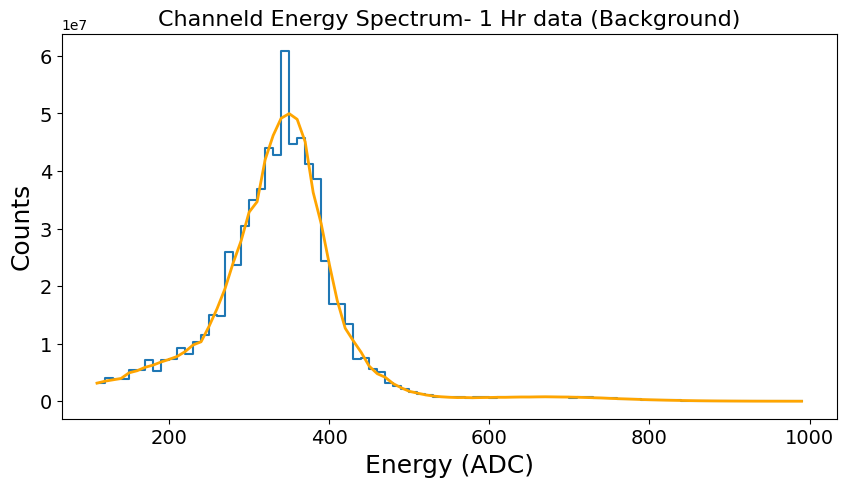

In [61]:
from scipy.signal import find_peaks, savgol_filter

plt.step(Bins[1:], n_EnergyAll_NVeto_all, label = "Data decays - %d"%n_EnergyAll_NVeto_all.sum())
label("Energy (ADC)", "Counts", 10,5)
# plt.yscale("log")
plt.title(r"Channeld Energy Spectrum- 1 Hr data (Background)", fontsize=16)


# Assuming 'bins' and 'n' are your original data
x = bins
y = n

# Apply smoothing to the data using Savitzky-Golay filter (or you can use moving average as well)
# window_size = int(1000/42)  # Window size for smoothing, should be odd
y_smooth = savgol_filter(y, 8, polyorder=3)
plt.plot(x, y_smooth, label='Smoothed Data', color='orange', linewidth=2)

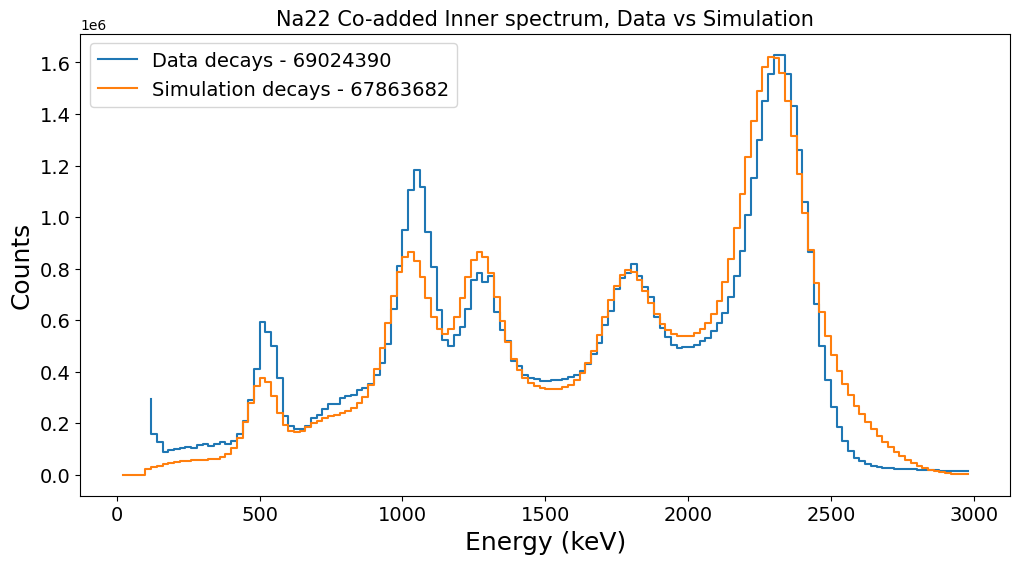

In [28]:
plt.step(Bins[1:], n_EnergyInner_NVeto_all, label = "Data decays - %d"%n_EnergyAll_NVeto_all.sum())
plt.step(bins_combined[1:], sim_energy_match_Inner, label = "Simulation decays - %d"%sim_energy_match_Inner[5:].sum())
label("Energy (keV)", "Counts", 12, 6)
n, bins = n_EnergyAll_NVeto_all, Bins[1:]
# gaus_fit(1850, 2200, 1200, 8e8, nm = "keV")
# gaus_fit(770, 990, 200, 3e8, nm = "keV")
# gaus_fit(1130, 1430, 1000, 2e6, nm = "keV")
# plt.xlim(0, 1000)
plt.legend(fontsize = 14)
plt.title(f"{source} Co-added Inner spectrum, Data vs Simulation", fontsize = 15)
plt.savefig("%s/Energy_%s_Inner.jpg"%(save_folder, source))

In [95]:
miss_889_data, 1275-1.2*99, 1275+1.2*99, i

(6921167.0, 1156.2, 1393.8, 2980)

In [94]:
miss_889_data = 0
for j,i in enumerate(Bins[1:]):
    if 1275-1.2*99<i<1275+1.2*99:
        miss_889_data += n_EnergyAll_NVeto_all[j]

miss_889_sim = 0
for j,i in enumerate(bins_combined[1:]):
    if 1275-1.2*99<i<1275+1.2*99:
        miss_889_sim += sim_energy_match[j]


In [97]:
miss_889_data/n_EnergyAll_NVeto_all.sum(), miss_889_sim/sim_energy_match[5:].sum()

(0.10027132438258418, 0.10263587825829239)

In [100]:
len(n_EnergyAll_NVeto_all)

144

In [23]:
count = 0
bins_mid = midpoints_array(bins)
for k, j in enumerate(n):
    if 877-1.2*72<bins_mid[k]<877+1.2*72 or 1109-1.2*94<bins_mid[k]<1109+1.2*94:
        count+=j
        

In [22]:
def midpoints_array(arr):

    midpoints = []

    for i in range(1, len(arr)):

        midpoint = (arr[i] + arr[i - 1]) / 2

        midpoints.append(midpoint)

    return midpoints

In [25]:
count, sum(n)

(2007280677.0, 13306335371.0)

In [32]:
save_folder_each = '../RUN5/Sc46/Figures/Take4_2/Folder_9'

In [33]:
file = "%s/Outputmultiplicity_5_9_1.pickle"%save_folder_each
f = open('%s'%(file), 'rb')
dat=pickle.load(f)
Multiplicity=dat['Multiplicity']
Multiplicity_raw=dat['Multiplicity_raw']
Multiplicity_889=dat['Multiplicity_889']
Multiplicity_1132=dat['Multiplicity_1132']
f.close()

In [38]:
Multiplicity_889

array([8.06178e+05, 3.33982e+05, 2.51920e+04, 5.92000e+02, 6.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00])

In [43]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],int(y[i]),fontsize=12)

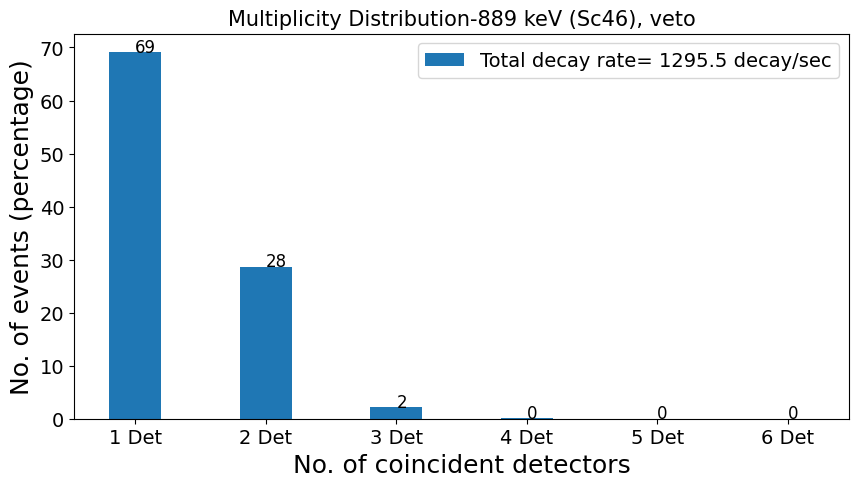

In [54]:
count = Multiplicity_889
total = count.sum()
count=count/count.sum()*100
count=np.array(count, dtype="float")
for j in range(len(count)):
    count[j]=round(count[j],2)
data_count = {'1 Det':count[0], '2 Det':count[1], '3 Det':count[2],
        '4 Det':count[3], '5 Det':count[4], '6 Det':count[5]}
courses = list(data_count.keys())
values = list(data_count.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.4, label="Total decay rate= %.1f decay/sec"%(total/(900)))   #Change time here
addlabels(courses, values)
plt.legend(fontsize=14)
label("No. of coincident detectors", "No. of events (percentage)", 8, 5)
plt.title("Multiplicity Distribution-889 keV (%s), %s"%("Sc46", "veto"), fontsize="15")
plt.savefig("%s/Multiplicity_889.jpg"%(save_folder_each))

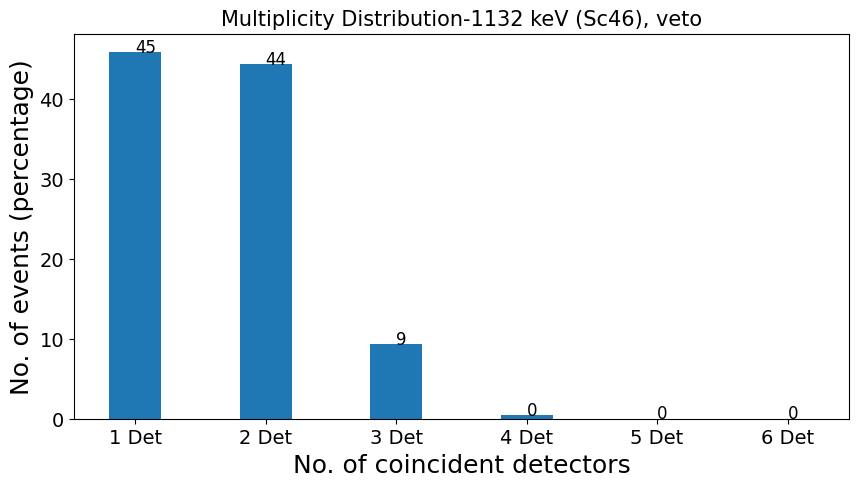

In [53]:
count = Multiplicity_1132
total = count.sum()
count=count/count.sum()*100
count=np.array(count, dtype="float")
for j in range(len(count)):
    count[j]=round(count[j],2)
data_count = {'1 Det':count[0], '2 Det':count[1], '3 Det':count[2],
        '4 Det':count[3], '5 Det':count[4], '6 Det':count[5]}
courses = list(data_count.keys())
values = list(data_count.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.4, label="Total decay rate= %.1f decay/sec"%(total/(900)))   #Change time here
addlabels(courses, values)
# plt.legend(fontsize=14)
label("No. of coincident detectors", "No. of events (percentage)", 8, 5)
plt.title("Multiplicity Distribution-1132 keV (%s), %s"%("Sc46", "veto"), fontsize="15")
plt.savefig("%s/Multiplicity_1132.jpg"%(save_folder_each))

# Simulation

In [35]:
save_folder_each = 'D:/Simulation/Cs137/Figures/Output_2'

In [36]:
file = "%s/Output_Run-folder2.pickle"%save_folder_each
f = open('%s'%(file), 'rb')
dat=pickle.load(f)
f.close()

In [17]:
bins_combined

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
       650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
       780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
       910, 920, 930, 940, 950, 960, 970, 980, 990], dtype=int64)

In [14]:
save_folder_each

'E:/Simulation/Ba133/Figures/Output_1'

In [37]:
n_EnergyAll = dat['n_EnergyAll']
n_EnergyInner = dat['n_EnergyInner']
bins_combined = dat['bins_combined']

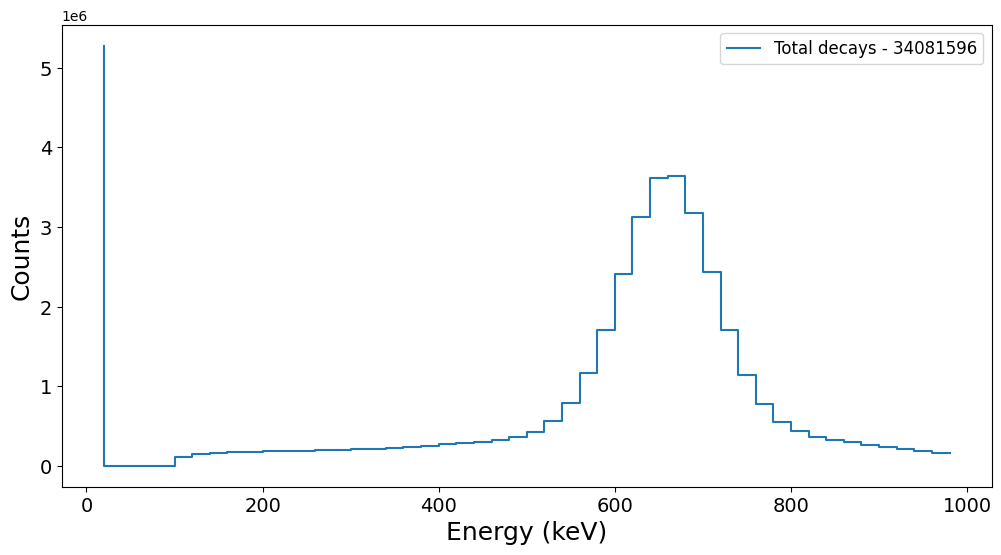

In [38]:
plt.step(bins_combined[1:], n_EnergyAll, label = "Total decays - %d"%n_EnergyAll[5:124].sum())
label("Energy (keV)", "Counts", 10, 5)
# plt.yscale("log")
plt.legend(fontsize = 12)
# plt.savefig("%s/Simulation_all.jpg"%(save_folder_each))

In [84]:
len(n_EnergyAll), bins_combined[120], n_EnergyAll[110]

(124, 2400, 15454.0)

In [93]:
bins_combined[45], (n_EnergyAll[44]+ n_EnergyAll[56])/ n_EnergyAll[5:124].sum(), n_EnergyAll[44]+ n_EnergyAll[56]

(900, 0.07492541213876609, 213311.0)

In [6]:
save_folder_each = '../Simulation/NoSmear/'

In [7]:
file = "%s/OutputTest_Run-folder5.pickle"%save_folder_each
f = open('%s'%(file), 'rb')
dat=pickle.load(f)
f.close()

In [9]:
energy_exclusive = dat['energy_exclusive']

In [27]:
min_val = [889-20, 1132-20, 889-20]
max_val = [889+20, 1132+20, 889+20]
any_gamma = ["889", "1132", "889"]

Text(0.5, 1.0, 'Rest energy to the detector at E_1 = 889 keV')

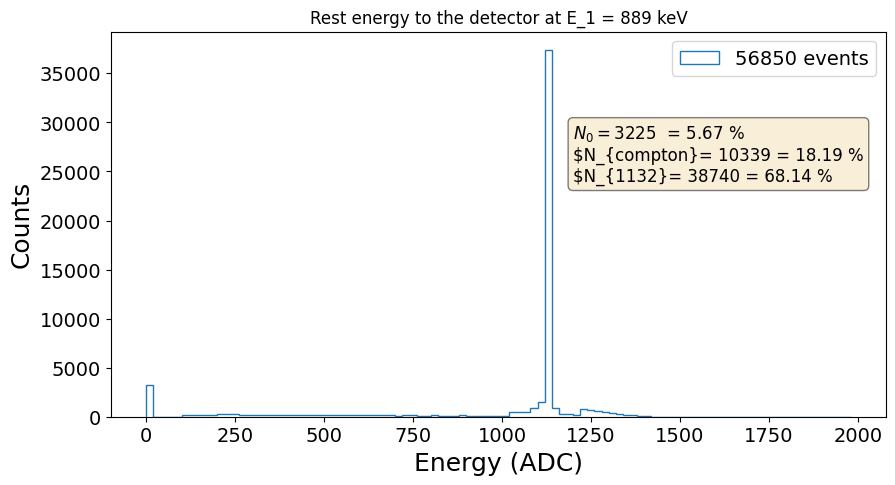

In [28]:
i=0
n,bins, patches=plt.hist(energy_exclusive[i], bins=np.arange(0,2000, 20), histtype="step", label="%d events"%len(energy_exclusive[i]))
label("Energy (ADC)", "Counts", 10,5)

count_889= np.zeros(3)
for j in energy_exclusive[i]:
    if j == 0:
        count_889[0]+=1
    elif j<min_val[i+1]:
        count_889[1]+=1
    elif min_val[i+1]<j<max_val[i+1]:
        count_889[2]+=1

plt.legend(fontsize=14)
textstr = '\n'.join((
        r'$N_0= %d$  = %.2f %%' % (count_889[0], count_889[0]/len(energy_exclusive[i])*100),
        r'$N_{compton}= %d = %.2f %%' % (count_889[1], count_889[1]/len(energy_exclusive[i])*100),
        r'$N_{%s}= %d = %.2f %%' % (any_gamma[i+1], count_889[2], count_889[2]/len(energy_exclusive[i])*100)
        ))               #"r'$\chi^2/Dof=%.2f$' % (b, )"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1200, max(n)*0.8, textstr, fontsize=12,
     verticalalignment='top', bbox=props)
plt.title("Rest energy to the detector at E_1 = %s keV"%(any_gamma[i]), fontsize = 12)
# plt.savefig("%s/EnergyRest_%s.png"%(save_folder, any_gamma[i]))
# plt.close()

In [ ]:
count_889= np.zeros(3)
for j in energy_exclusive[i]:
    if j == 0:
        count_889[0]+=1
    elif j<min_val[i]:
        count_889[1]+=1
    elif min_val[i]<j<max_val[i]:
        count_889[2]+=1

In [21]:
n.max(), bins[55:60], n[55:60]

(37377.0,
 array([1100., 1120., 1140., 1160., 1180.]),
 array([ 1527., 37377.,   898.,   282.,   275.]))

# Background data analysis

In [4]:
N_det=26+11
Det_Comb=21

energyThreshold = 100
timeWindow=5e-7
Date="103024"
         #Not required if you are doing the full run. 
#first cut_data event or 2nd, Ex: index=0 means collecting first 60 second of data and 
                                 #index=1 means collecting second 60 second of data and so on...     
# run_index=0      #int(sys.argv[1])    #Type the index of run mentioned in the data file, required while taking multiple dataset 

                        #glob.glob("../RUN4/Sc46/DAQ/*")
folder_index = 7   #int(sys.argv[1])
read_folder = "../RUN5/Background/DAQ/CsI_NoSource_Take4_%d//"%folder_index
index = 0
run_index = 5


save_folder = '../RUN5/Background/Figures/Take4/'
cut_data=3600               #Select the required second of data
innerChannel=np.arange(16,26)
date="%s"%(Date)
serial=np.array(["1st","2nd","3rd","4th","5th","6th", "7th", "8th"])
save_folder_each = os.path.join(save_folder, "Folder_%d"%folder_index)


In [5]:
files = glob.glob('%s/RAW/*.CSV'%read_folder)
files=natsorted(files)
# files = files
# print(files)
MinTime=np.zeros(N_det)
for nf,nfile in enumerate(files):
    # nfile1 = os.path.join(folder_path, nfile)
    file = open(nfile)
    csvreader = csv.reader(file, delimiter = ';')
    header = next(csvreader)
    line_count = 0
    for row in csvreader:
        if line_count == 0:
            MinTime[nf] = float(row[2]) * 1e-12
            break
minTime=np.min(MinTime)


# In[5]:

data=[]
for j in range(3):                                     #3=channel, time, calib. energy
    b=[]
    data.append(b)
nEvent=np.zeros(len(files))
for nf,nfile in enumerate(files):
    # nfile1 = os.path.join(folder_path, nfile)
    file = open(nfile)
    csvreader = csv.reader(file, delimiter = ';')
    header = next(csvreader)
    line_count = 0
    for row in csvreader:
        if float(row[2])*1e-12 - minTime>=cut_data*index:
            data[0].append(int(row[1]))
            data[1].append(float(row[2])*1e-12 - minTime)
            data[2].append(float(row[3]))     # row[4] = Caliberated energy, row[3] = ADC energy sometime, else row[3] = Caliberated energy
            line_count += 1
            # if line_count%1000000==0:
            #     print("%d M data loaded"%int(line_count/1000000))
            if float(row[2])*1e-12 - minTime>cut_data*(index+1):
                data[0].pop()
                data[1].pop()
                data[2].pop()
                break
    nEvent[nf]=line_count-1
    print("file %d done"%nf)
nEvents=int(nEvent.sum())


Data_Time=round((data[1][nEvents-1]-data[1][0]),0)
print("Total Time for this data set is %d s"%Data_Time)

file 0 done
file 1 done
file 2 done
file 3 done
file 4 done
file 5 done
file 6 done
file 7 done
file 8 done
file 9 done
file 10 done
file 11 done
file 12 done
file 13 done
file 14 done
file 15 done
file 16 done
file 17 done
file 18 done
file 19 done
file 20 done
file 21 done
file 22 done
file 23 done
file 24 done
file 25 done
file 26 done
file 27 done
file 28 done
file 29 done
file 30 done
file 31 done
file 32 done
file 33 done
file 34 done
file 35 done
file 36 done
Total Time for this data set is 3599 s


In [6]:
data=np.array(data).T
data=data[data[:, 1].argsort()]
data=np.array(data).T

In [44]:
nEvents = len(data[0])
energyPlot=[[] for _ in range(26)]
for i in range(nEvents):
    if data[0][i] < 26:
        energyPlot[int(data[0][i])].extend([data[2][i]])

In [56]:
mean = np.zeros(26)

Peak found at x = 160.0, y = 222.6805429864266


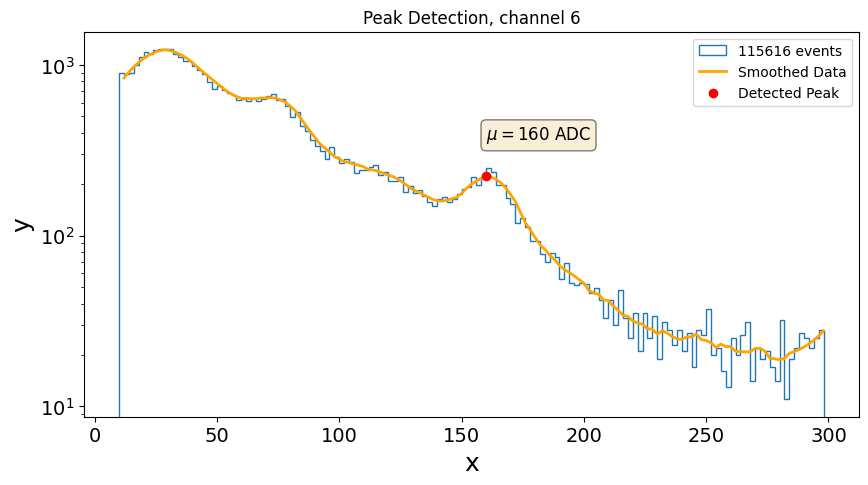

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import find_peaks, savgol_filter


k= 6

bin_last = np.array([250, 300, 350, 300, 250,       400, 300, 600, 300, 500,       250, 650, 450, 170, 560, 
                     250, 400, 350, 300, 600,       300, 200, 400, 200, 500, 700])
n,bins, patches=plt.hist(energyPlot[k], bins=np.arange(10,bin_last[k],2), histtype="step", label="%d events"%len(energyPlot[k]))
label("Energy (ADC)", "Counts", 10,5)
plt.yscale("log")
plt.title(r"Channel %d Energy Spectrum- 1 Hr data (Background)"%k, fontsize=16)


# Assuming 'bins' and 'n' are your original data
x = bins[1:]
y = n

# Apply smoothing to the data using Savitzky-Golay filter (or you can use moving average as well)
window_size = int(bin_last[k]/20)  # Window size for smoothing, should be odd
y_smooth = savgol_filter(y, window_size, polyorder=3)

# Find the minimum value of the spectrum
min_value = np.min(x)
max_value = np.max(x)

# Define the threshold as 20% of the minimum value
threshold = 0.4 * max_value + min_value 

# Create a mask to select the data points where y is greater than 20% of the minimum value
mask = x >= threshold

# Subset the data starting from the point where the values are above the threshold
x_subset = x[mask]
y_subset = y_smooth[mask]

# Find peaks in the subset of the data
peaks, _ = find_peaks(y_subset, distance=10, height=0)  # Adjust distance to ensure separation

# If no peaks are found, you can handle it accordingly
if len(peaks) > 0:
    # Get the index of the single highest peak in the subset
    top_peak_idx = np.argmax(y_subset[peaks])
    peak_x = x_subset[peaks[top_peak_idx]]
    peak_y = y_subset[peaks[top_peak_idx]]
else:
    peak_x = None
    peak_y = None

# Print the results
print(f"Peak found at x = {peak_x}, y = {peak_y}")

textstr = r'$\mu=%d $ ADC' %(peak_x)                        #"r'$\chi^2/Dof=%.2f$' % (b, )"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(peak_x, peak_y*2, textstr, fontsize=12,
         
         verticalalignment='top', bbox=props)

# Plot the original data, smoothed data, and the detected peak
# plt.plot(x, y, label='Original Data', alpha=0.5)
plt.plot(x, y_smooth, label='Smoothed Data', color='orange', linewidth=2)
if peak_x is not None:
    plt.scatter(peak_x, peak_y, color='red', label='Detected Peak', zorder=5)
plt.legend()
plt.yscale("log")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Peak Detection, channel %d'%k)
# plt.show()
plt.savefig("%s/Energy_Ch%d.jpg"%(save_folder_each,k))
mean[k] = peak_x

In [110]:
Mean = np.zeros((26,2))
Mean[:,0] = mean

In [1]:
save_folder_each

NameError: name 'save_folder_each' is not defined

In [111]:
f = open('%s/Calibration_parameter_folder%d_index%d.pickle'%(save_folder_each, folder_index, index), 'wb')
Parameter={"Mean":Mean}
pickle.dump(Parameter, f)
f.close()

In [8]:
f = open('%s/Calibration_parameter_folder%d_index1.pickle'%(save_folder_each, folder_index), 'rb')
dat = pickle.load(f)
mean=dat['Mean']
f.close()

In [10]:
mean[:,0]

array([132., 194., 184., 170., 158., 198., 160., 332., 134., 242., 126.,
       360., 258.,  88., 326., 114., 184., 198., 142., 260., 152., 110.,
       214., 110., 282., 444.])

In [12]:
nEvents = len(data[0])
energy_source = 1460
for j in range(nEvents):
    if data[0][j]<26:
        data[2][j]=data[2][j]/mean[int(data[0][j]), 0]*energy_source

In [33]:
import numpy as np

def calculate_uncertainty_division(A, B, rho=0):
    """
    Calculate the propagated uncertainty in z = A / B, 
    considering correlation between A and B.

    Parameters:
        A (float): Numerator value
        B (float): Denominator value
        sigma_A (float): Uncertainty in A
        sigma_B (float): Uncertainty in B
        rho (float): Correlation coefficient (-1 to 1). Default is 0 (independent).

    Returns:
        z (float): Result of A / B
        sigma_z (float): Uncertainty in z
    """
    sigma_A = np.sqrt(A)  # Assuming Poisson stats: sqrt(A)
    sigma_B = np.sqrt(B)  
    z = A / B
    relative_uncertainty = np.sqrt(
        (sigma_A / A) ** 2 + (sigma_B / B) ** 2 - 2 * rho * (sigma_A / A) * (sigma_B / B)
    )
    sigma_z = z * relative_uncertainty
    return z, sigma_z

# Example values
rho =1
A = 835850  # Numerator value
B = 8259752  # Denominator value
# Calculate uncertainty
z, sigma_z = calculate_uncertainty_division(A, B, rho)
print(z*100, sigma_z*100)

A = 1012785
B= 17731134
z, sigma_z = calculate_uncertainty_division(A, B, rho)
print(z*100, sigma_z*100)

A = 46693*0.94/4
B = 8259752
z, sigma_z = calculate_uncertainty_division(A, B, rho)
print(z*100, sigma_z*100)

10.119553226295414 0.0075476182393344905
5.711902013712152 0.004319257926408293
0.1328472695063968 0.0012219906155214368


In [34]:
# Example values
rho =1
A = 630719  # Numerator value
B = 6713052  # Denominator value
# Calculate uncertainty
z, sigma_z = calculate_uncertainty_division(A, B, rho)
print(z*100, sigma_z*100)

A = 671189
B= 7293020
z, sigma_z = calculate_uncertainty_division(A, B, rho)
print(z*100, sigma_z*100)

A = 39178*0.94/4
B = 6713052
z, sigma_z = calculate_uncertainty_division(A, B, rho)
print(z*100, sigma_z*100)

9.395413591314353 0.008204125000730466
9.203169606006838 0.007825622430514613
0.13714820025228466 0.0013764049263531016


In [143]:
mean = np.array([132, 188, 184, 166, 150, 234, 162, 442, 130, 246, 128, 363, 259, 
                83, 337, 115, 185, 199, 141, 261, 153, 87, 213, 109, 285, 410])

In [13]:
from ASCID_analysis import *

Total full data files yet:16
Folder name ../RUN5/Background/DAQ\CsI_NoSource_Take4_10
Actual memory of the selected folder: 0.87 G


In [146]:
nEvents = len(data[0])
energy_source = 1460
for j in range(nEvents):
    if data[0][j]<26:
        data[2][j]=data[2][j]/mean[int(data[0][j])]*energy_source

In [14]:
analysis = ASCID_analysis(data, 3600)
analysis.data_preprocess()
analysis.coincidence()
analysis.CoaddedEnergy()
analysis.added_energy("All", plot = plottype)
analysis.added_energy("inner", plot = plottype)
analysis.multiplicity(plot = plottype, veto = "Veto")
analysis.multiplicity(plot = plottype, veto = "noVeto")
analysis.coincidence_1det(plot = plottype)
analysis.coincidence_2det(plot = plottype)
analysis.save_pickle(energy = False)

Data preprocessing done
data coincidence done
0 M events done
grouped energy done


In [50]:
root_directory="E:/RUN5/Take5/Ba133/Figures/Norm_Th"  
partial_name = "Efficiency_count"
sorted_files = search_and_sort_files(root_directory, partial_name)
len(sorted_files)

72

In [81]:
file = sorted_files[0][0]
f = open('%s'%(file), 'rb')
dat=pickle.load(f)
Count = dat['Count']
Energy_range=dat['Energy_range']
np.shape(Count)

(5608, 26)

In [82]:
Count[:, 0].sum()

8139

In [57]:
Count_data = np.zeros((199, 26))
n = 0
for j in range(18):
    try:
        file = sorted_files[j][0]
        f = open('%s'%(file), 'rb')
        dat=pickle.load(f)
        # Bins=dat['Bins']
        count = np.array(dat['Count'])
        count = count[:199, :]
        # print(np.shape(count))
        Count_data += count
        f.close()
        n+=1
    except:
        pass

18

In [4]:
count = dat['Count']
Energy = dat['Energy_range']

(0.0, 1000.0)

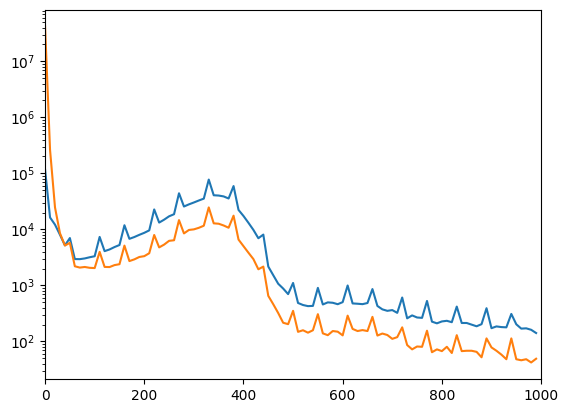

In [78]:
c = 6
plt.plot(Energy_range[0:100], Count_data[0:100, c])
plt.plot(Energy_range[0:100], Count_RAW[0:100, c])
plt.yscale("log")
plt.xlim(0, 1000)

In [83]:
root_directory="E:/RUN5/Take5/Ba133/Figures/low_Th"  
partial_name = "Efficiency_count"
sorted_files = search_and_sort_files(root_directory, partial_name)
len(sorted_files)

18

In [46]:
Count_RAW = np.zeros((199, 26))
n = 0
for j in range(len(sorted_files)):
    try:
        file = sorted_files[j][0]
        f = open('%s'%(file), 'rb')
        dat=pickle.load(f)
        # Bins=dat['Bins']
        count = np.array(dat['Count'])
        count = count.T
        Count_RAW += count
        f.close()
        n+=1
    except:
        pass

In [84]:
file = sorted_files[0][0]
f = open('%s'%(file), 'rb')
dat=pickle.load(f)
Count = dat['Count']
Energy_range=dat['Energy_range']
np.shape(Count)

(26, 199)

In [92]:
Count[0].sum()/300/1000

9.014636666666668